In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n_students = 100000

# Generate correlated reading speed and comprehension score
reading_speed = np.random.normal(220, 25, n_students)  # WPM
comprehension_score = np.clip(np.random.normal(reading_speed / 300, 0.05), 0.6, 1.0)

# Reading efficiency: speed * comprehension
reading_efficiency = reading_speed * comprehension_score

# Generate video and text times
video_time = np.random.normal(45, 10, n_students)
text_time = np.random.normal(30, 5, n_students)

# Visual engagement depends on preference for video
visual_engagement = video_time / (video_time + text_time)

# Response time inversely related to quiz score (faster = higher score)
base_response_time = np.random.normal(15, 3, n_students)
quiz_score = np.clip(100 - base_response_time * 3 + np.random.normal(0, 3, n_students), 50, 100)
response_time = np.clip(base_response_time + np.random.normal(0, 1.5, n_students), 5, 30)

# Final DataFrame
df = pd.DataFrame({
    'reading_speed': reading_speed,
    'comprehension_score': comprehension_score,
    'reading_efficiency': reading_efficiency,
    'video_time': video_time,
    'text_time': text_time,
    'visual_engagement': visual_engagement,
    'response_time': response_time,
    'quiz_score': quiz_score
})

# Preview data
df.head()


,reading_speed,comprehension_score,reading_efficiency,video_time,text_time,visual_engagement,response_time,quiz_score
0,232.417854,0.826256,192.036625,60.618407,23.000892,0.724933,26.845631,50.000000
1,216.543392,0.664044,143.794247,44.057717,32.739114,0.573692,14.390415,53.872129
2,236.192213,0.816079,192.751562,31.704644,29.396188,0.518891,8.713711,72.635508
3,258.075746,0.829291,214.019782,31.113619,28.583681,0.521190,16.004110,51.618345
4,214.146166,0.697450,149.356331,41.573492,33.837846,0.551290,16.968343,56.841045


In [2]:
df.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\raw\Clustering_student_data.csv', index=False)

In [5]:
df.shape

(100000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   reading_speed        100000 non-null  float64
 1   comprehension_score  100000 non-null  float64
 2   reading_efficiency   100000 non-null  float64
 3   video_time           100000 non-null  float64
 4   text_time            100000 non-null  float64
 5   visual_engagement    100000 non-null  float64
 6   response_time        100000 non-null  float64
 7   quiz_score           100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [7]:
df.describe()

,reading_speed,comprehension_score,reading_efficiency,video_time,text_time,visual_engagement,response_time,quiz_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,220.024172,0.737234,164.117361,44.984917,29.999355,0.595132,14.987459,56.834362
std,25.022649,0.089994,37.252174,9.998523,5.007971,0.070399,3.352783,7.139784
min,108.359903,0.600000,65.015942,0.861140,8.435135,0.026456,5.000000,50.000000
25%,203.137653,0.667964,136.303064,38.258028,26.604475,0.552562,12.712595,50.000000
50%,220.066240,0.733758,161.244637,44.972797,30.012973,0.599791,14.969028,55.051793
75%,236.922867,0.799077,188.152954,51.720430,33.363307,0.643051,17.256438,61.476788
max,331.977106,1.000000,331.977106,87.193663,49.590925,0.858999,29.416071,100.000000


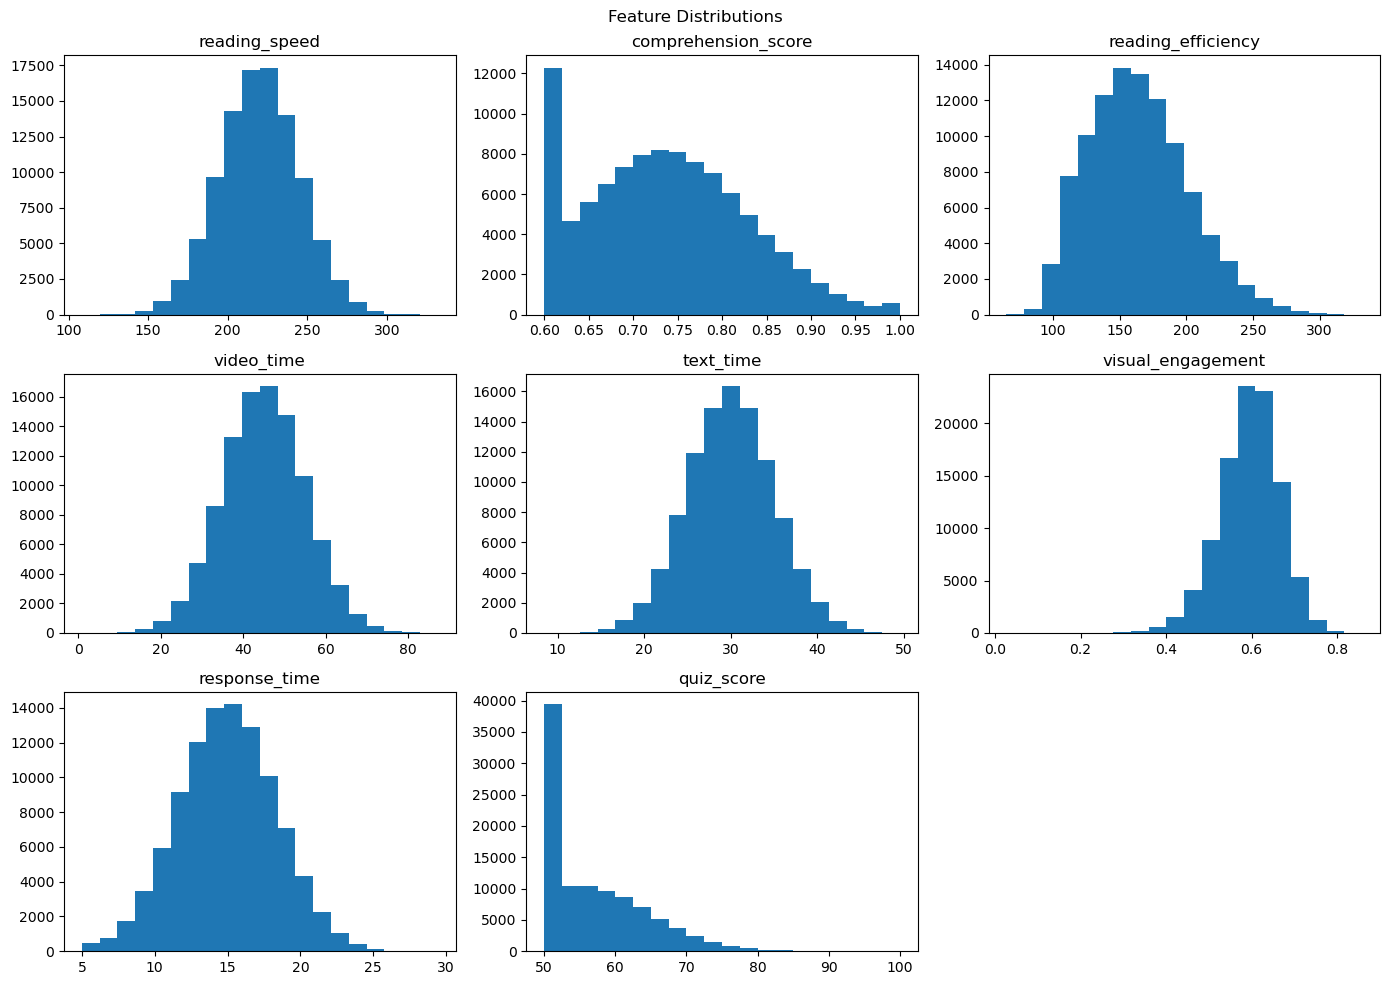

In [8]:
# Histogram for each numeric column
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

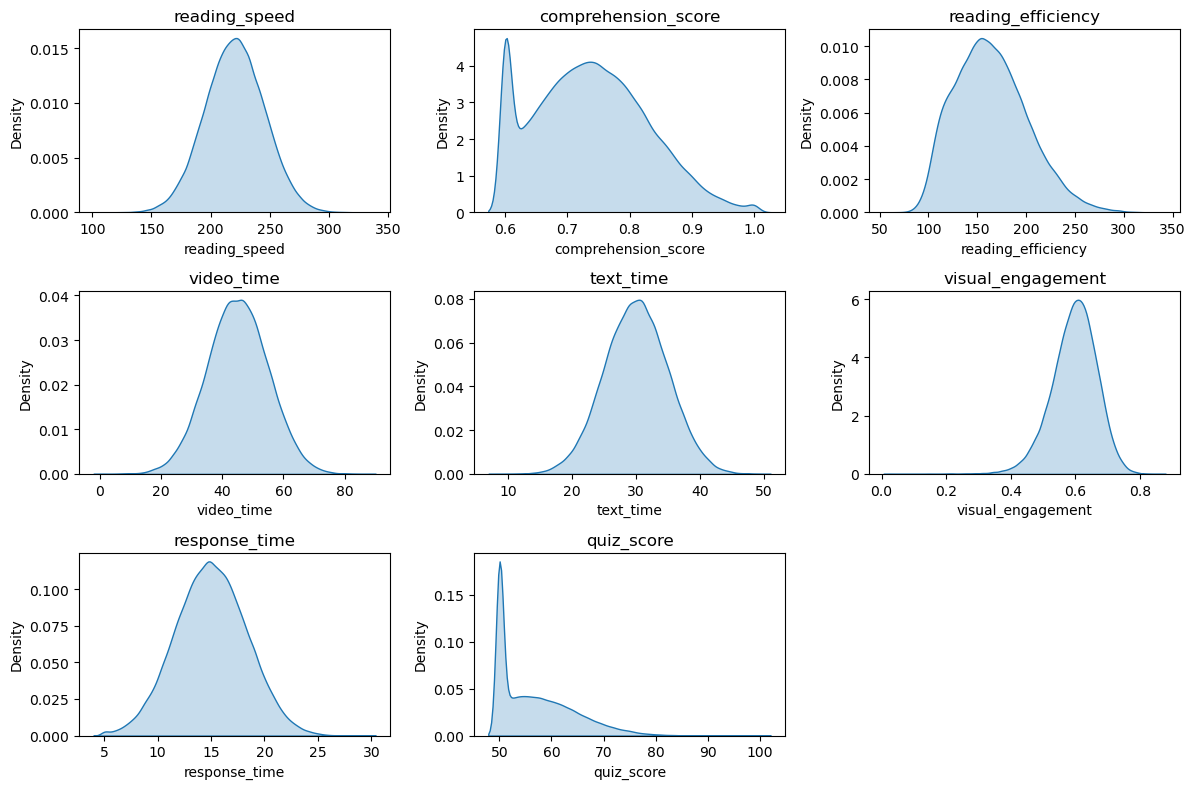

In [9]:
import warnings
warnings.filterwarnings("ignore")
# KDE plots for key features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[column], shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()

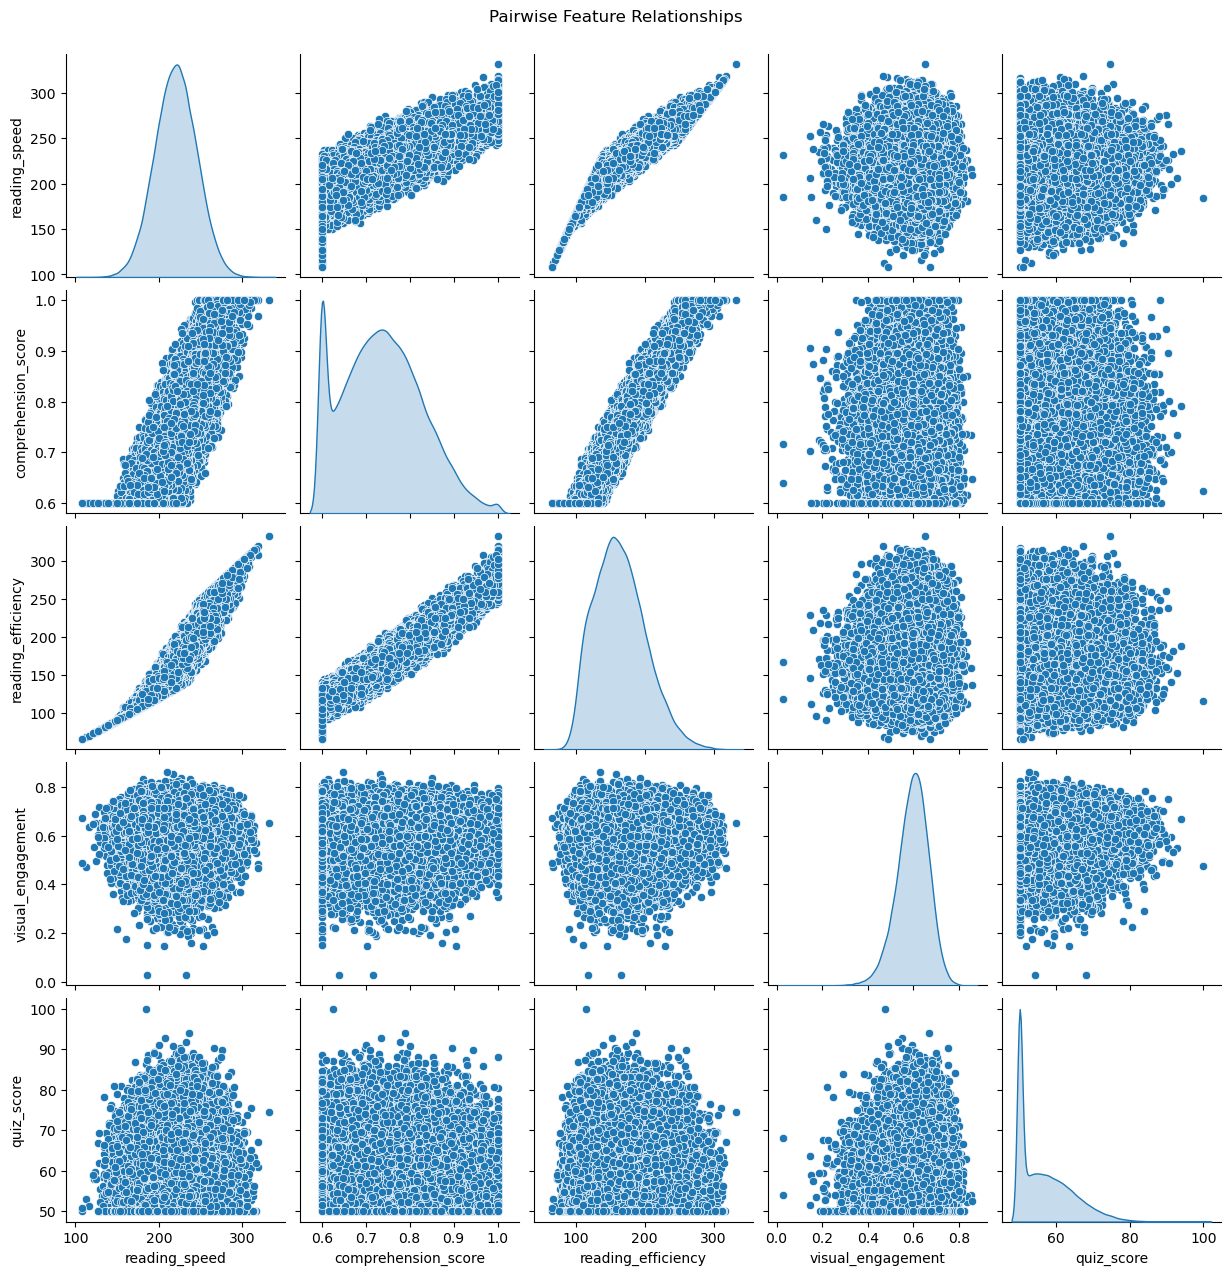

In [10]:
sns.pairplot(df[['reading_speed', 'comprehension_score', 'reading_efficiency', 'visual_engagement', 'quiz_score']], diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

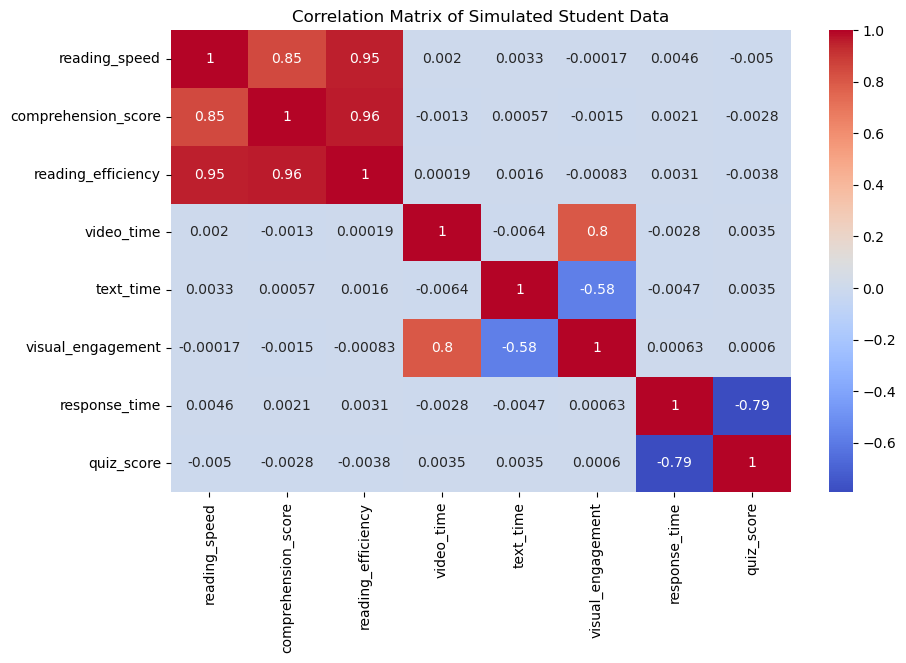

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Simulated Student Data")
plt.show()

<Axes: >

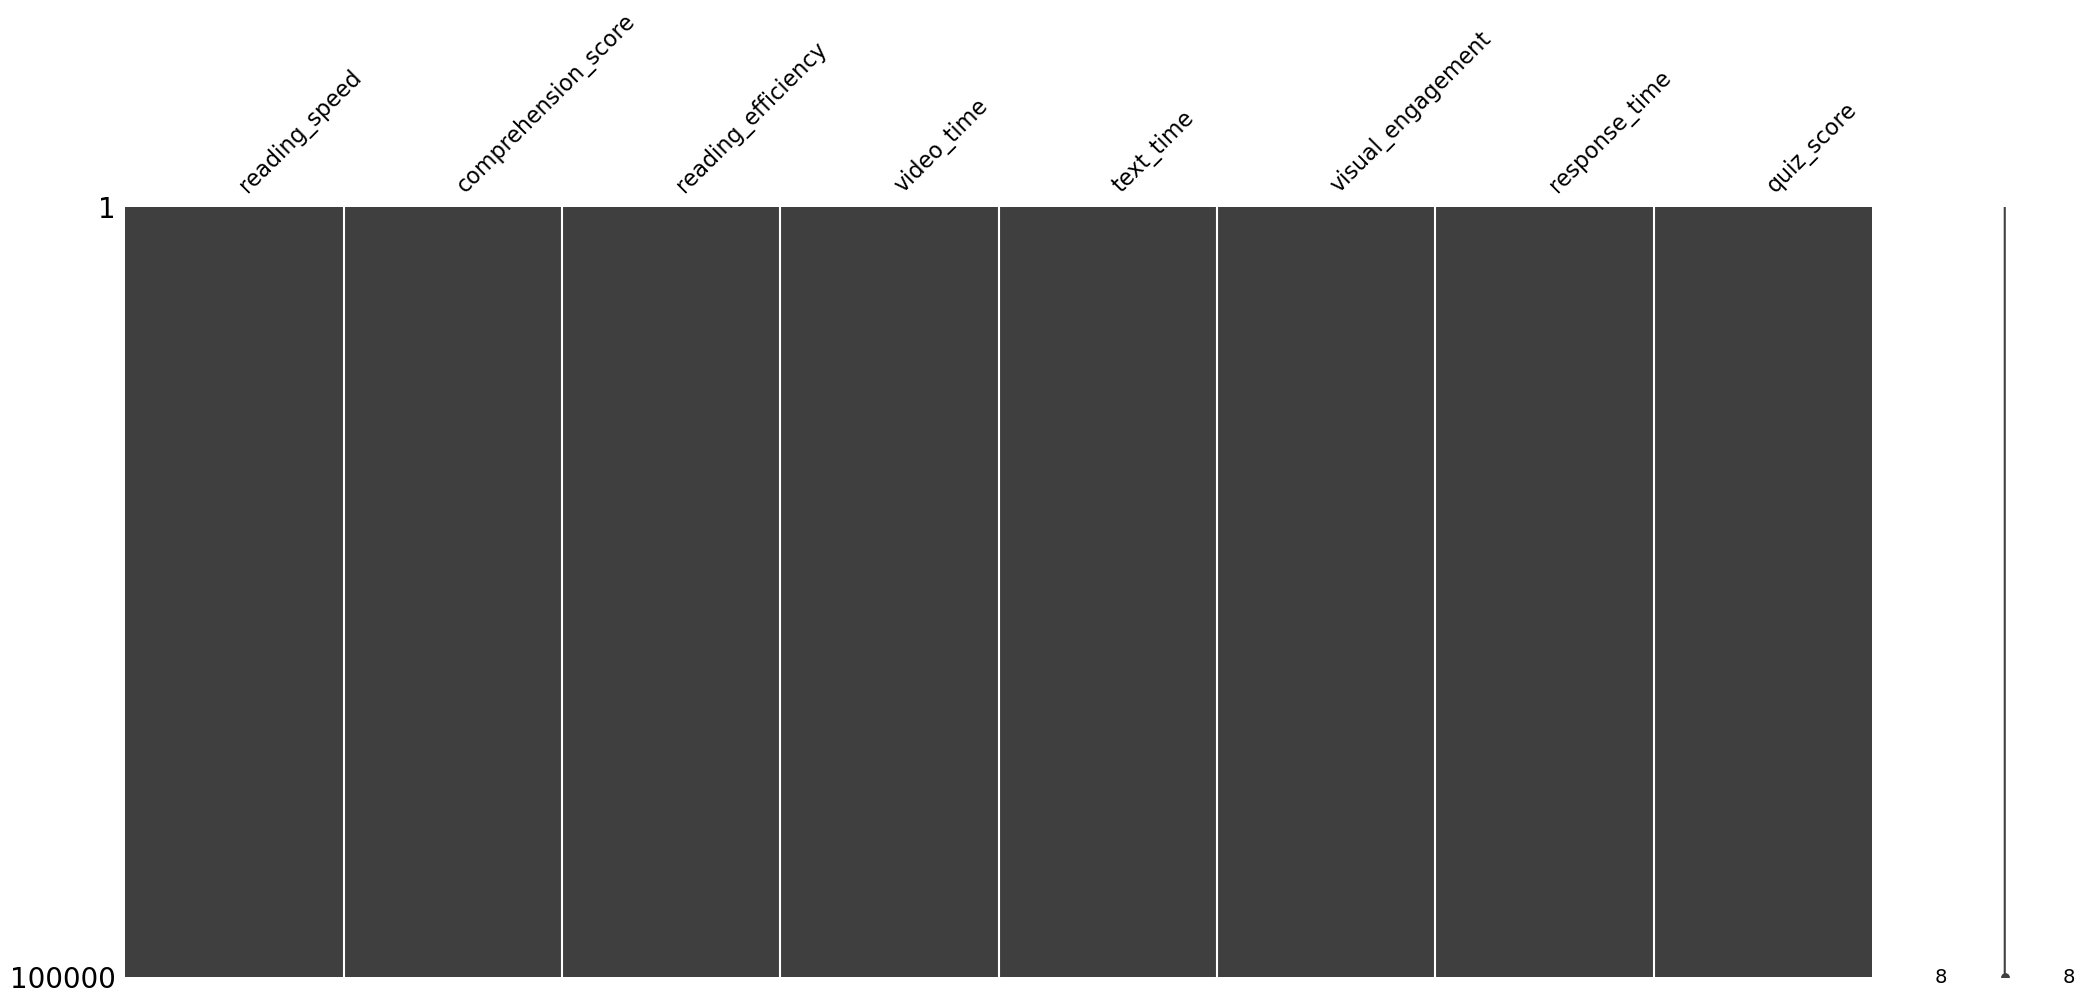

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
df.isnull().sum()

reading_speed          0
comprehension_score    0
reading_efficiency     0
video_time             0
text_time              0
visual_engagement      0
response_time          0
quiz_score             0
dtype: int64

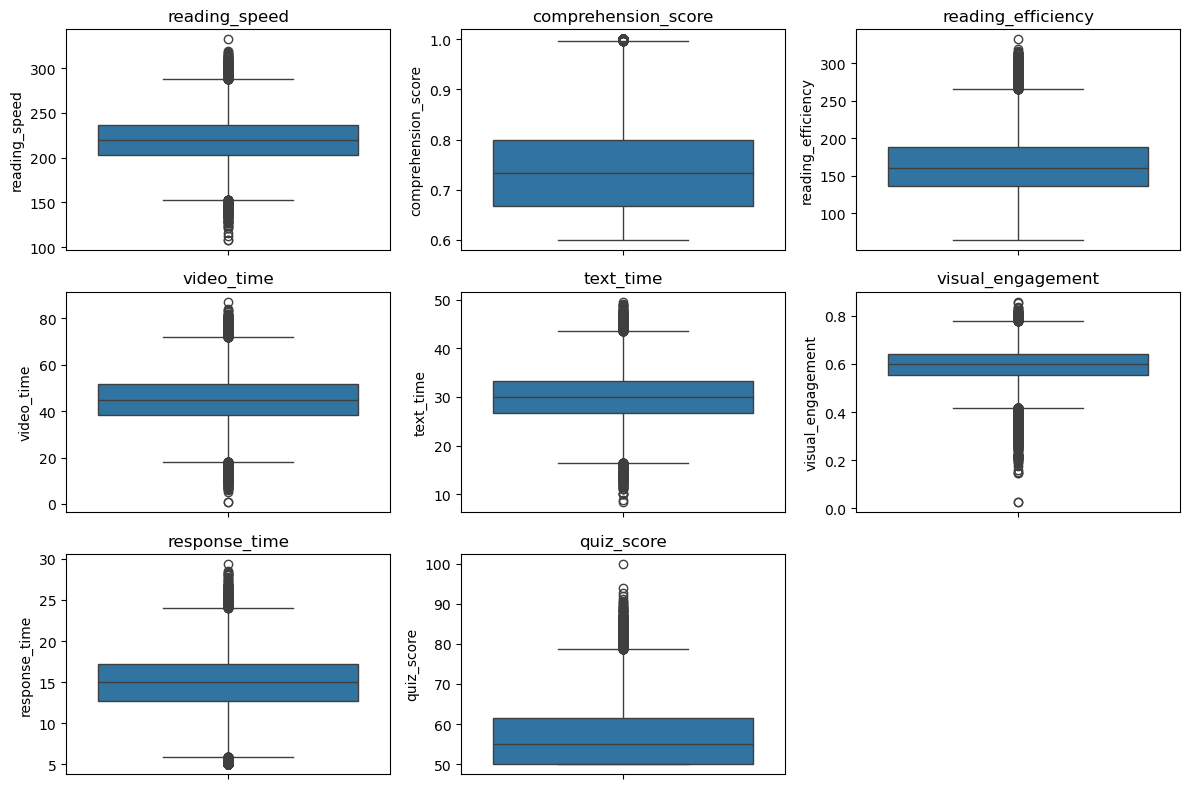

In [15]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats.mstats import winsorize
df['reading_speed'] = winsorize(df['reading_speed'], limits=[0.01, 0.01])
df['comprehension_score'] = winsorize(df['comprehension_score'], limits=[0.01, 0.01])   
df['reading_efficiency'] = winsorize(df['reading_efficiency'], limits=[0.01, 0.01])
df['video_time'] = winsorize(df['video_time'], limits=[0.01, 0.01])
df['text_time'] = winsorize(df['text_time'], limits=[0.01, 0.01])
df['visual_engagement'] = winsorize(df['visual_engagement'], limits=[0.05, 0.05])
df['response_time'] = winsorize(df['response_time'], limits=[0.01, 0.01])
df['quiz_score'] = winsorize(df['quiz_score'], limits=[0.05, 0.05])


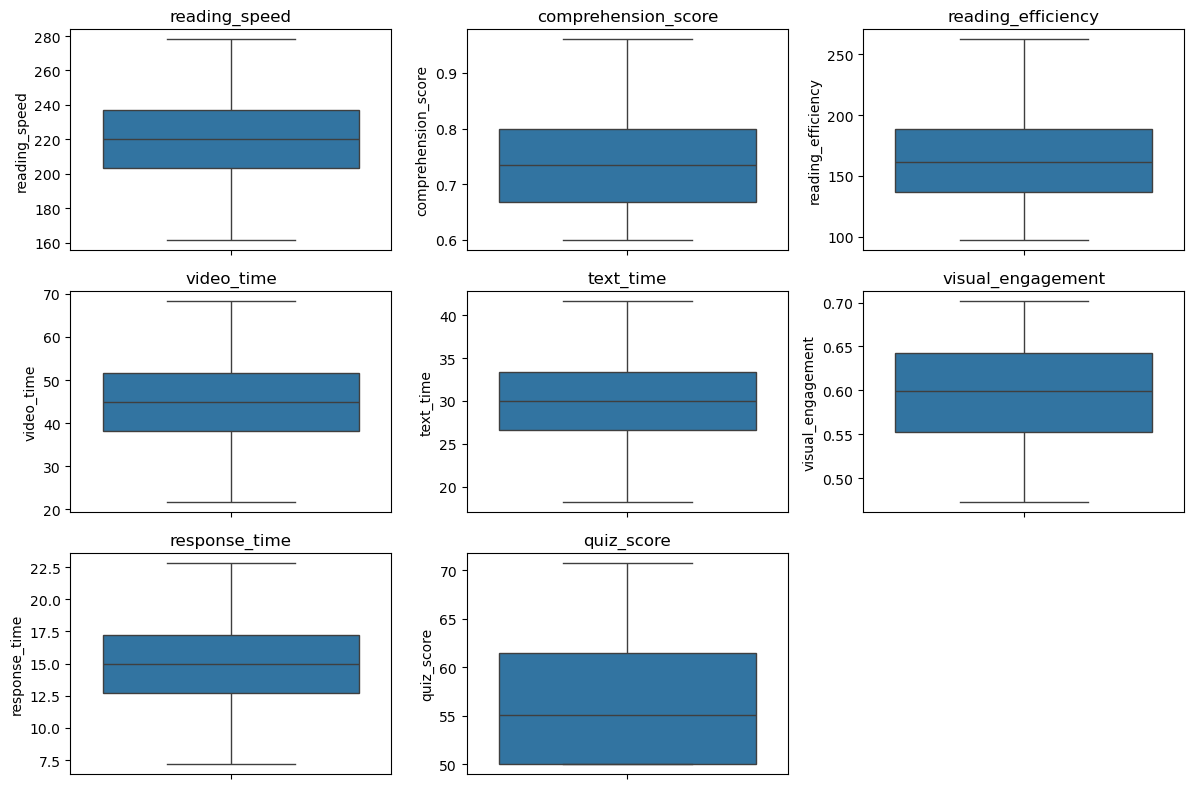

In [17]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [18]:
features = ['reading_efficiency', 'visual_engagement', 'response_time', 'quiz_score']
X = df[features]

In [19]:
import os
import sys
sys.path.append(os.path.abspath(r'D:\Guvi_Project\Personalized Learning Assistant\src'))
from feature_engineering import normalisation
X_scaled = normalisation(X, name = 'StandardScaler-sec3')

StandardScaler-sec3 Model saved successfully.


In [20]:
X_scaled.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\processed\Clustering_student_data_processed.csv', index=False)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [22]:
from Model_Training import pickle_dump
pickle_dump(kmeans, name='KMeans-sec3')

KMeans-sec3 Model saved successfully.


In [23]:
silhouette_score(X_scaled, kmeans.labels_)

0.2371313721307879

In [24]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

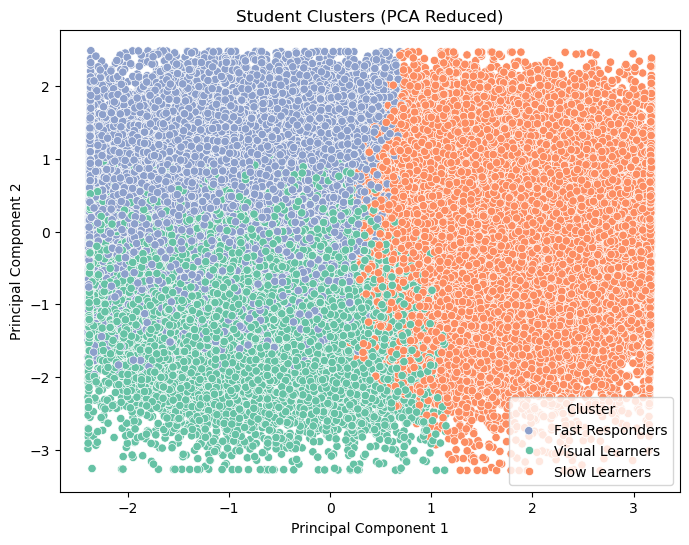

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Student Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', labels=['Fast Responders','Visual Learners','Slow Learners'])
plt.show()

In [26]:
df['cluster'].replace({ 0: 'Visual Learners',1: 'Fast Responders', 2: 'Slow Learners'}, inplace=True)

In [27]:
cluster_summary = df.groupby('cluster')[features].max()
print("Cluster Summary:\n")
print(cluster_summary)

Cluster Summary:

                 reading_efficiency  visual_engagement  response_time  \
cluster                                                                 
Fast Responders          262.283311           0.701252      18.182225   
Slow Learners            262.283311           0.701252      22.784565   
Visual Learners          262.283311           0.599828      22.784565   

                 quiz_score  
cluster                      
Fast Responders   70.673909  
Slow Learners     65.284519  
Visual Learners   67.711683  


In [28]:
df.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\processed\Clustering_student_data_with_clusters.csv', index=False)